In [1]:
!pip install scikeras

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import Pipeline

In [3]:
DATA_PATH = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

In [4]:
column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
    "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
    "hours_per_week", "native_country", "income"
]

In [5]:
df = pd.read_csv(DATA_PATH, names=column_names, na_values=" ?", skipinitialspace=True)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
num_rows, num_cols = df.shape
print(f"Rows: {num_rows}, Columns: {num_cols}")

Rows: 32561, Columns: 15


In [7]:
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [8]:
df.dropna(inplace=True)
print(df.isnull().sum().sum())

0


In [9]:
positive_cases = (df['income'] == '>50K').mean() * 100
print(f"Percentage of >50K cases: {positive_cases:.2f}%")

Percentage of >50K cases: 24.08%


In [10]:
le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])
print(df['income'].value_counts())

income
0    24720
1     7841
Name: count, dtype: int64


In [11]:
X = df.drop(columns=['income'])
y = df['income']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (26048, 14), Testing set: (6513, 14)


In [14]:
majority_class = y_train.value_counts().idxmax()
print(f"Majority class: {majority_class}")

Majority class: 0


In [15]:
y_pred_majority = np.full_like(y_test, fill_value=majority_class)

In [16]:
auc_score = roc_auc_score(y_test, y_pred_majority)
print(f"AUC Score for majority class predictor: {auc_score:.4f}")

AUC Score for majority class predictor: 0.5000


In [17]:
categorical_cols = [
    "workclass", "education", "marital_status", "occupation",
    "relationship", "race", "sex", "native_country"
]

In [18]:
numerical_cols = [
    "age", "fnlwgt", "education_num", "capital_gain",
    "capital_loss", "hours_per_week"
]

In [19]:
preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ("scaler", MinMaxScaler(), numerical_cols)
])

In [20]:
X_transformed = preprocessor.fit_transform(X)

In [21]:
print(f"New shape after transformations: {X_transformed.shape}")

New shape after transformations: (32561, 108)


In [22]:
onehot_feature_count = sum(len(preprocessor.named_transformers_["onehot"].categories_[i]) for i in range(len(categorical_cols)))

In [23]:
new_column_count = onehot_feature_count + len(numerical_cols)
print(f"Total columns after transformation: {new_column_count}")

Total columns after transformation: 108


In [35]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')

])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [111]:
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import roc_auc_score

In [112]:
categorical_cols = [
    "workclass", "education", "marital_status", "occupation",
    "relationship", "race", "sex", "native_country"
]

In [120]:
numerical_cols = [
    "age", "fnlwgt", "education_num", "capital_gain",
    "capital_loss", "hours_per_week"
]

In [121]:
preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ("scaler", MinMaxScaler(), numerical_cols)
])

In [122]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [123]:
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_dim=X_train_transformed.shape[1]),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
    return model

In [151]:
keras_model.fit(X_train_transformed, y_train)
y_pred_prob = keras_model.predict_proba(X_test_transformed)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score on test data: {auc_score:.4f}")

Epoch 1/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8045 - loss: 0.4274
Epoch 2/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8957 - loss: 0.3367
Epoch 3/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.9032 - loss: 0.3245
Epoch 4/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.9053 - loss: 0.3199
Epoch 5/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9111 - loss: 0.3111
Epoch 6/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9132 - loss: 0.3080
Epoch 7/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9147 - loss: 0.3054
Epoch 8/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.9161 - loss: 0.3024
Epoch 9/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.9201 - loss: 0.2971
Epoch 10/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9205 - loss: 0.2981
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
AUC Score on test data: 0.9094


In [154]:
print(X_train_transformed.shape)

(26048, 108)


In [155]:
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_dim=108),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
    return model

In [156]:
from keras.layers import Input

def create_model():
    model = Sequential([
        Input(shape=(108,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
    return model

In [157]:
model = create_model()
model.fit(X_train_transformed, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8141 - loss: 0.4173
Epoch 2/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.8952 - loss: 0.3382
Epoch 3/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9063 - loss: 0.3216
Epoch 4/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9080 - loss: 0.3175
Epoch 5/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9096 - loss: 0.3128
Epoch 6/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9141 - loss: 0.3069
Epoch 7/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.9151 - loss: 0.3038
Epoch 8/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9191 - loss: 0.2995
Epoch 9/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9196 - loss: 0.2985
Epoch 10/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9205 - loss: 0.2951


In [158]:
y_pred_prob = model.predict(X_test_transformed)[:, 0]
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score on test data: {auc_score:.4f}")

204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
AUC Score on test data: 0.9100


In [160]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

In [161]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

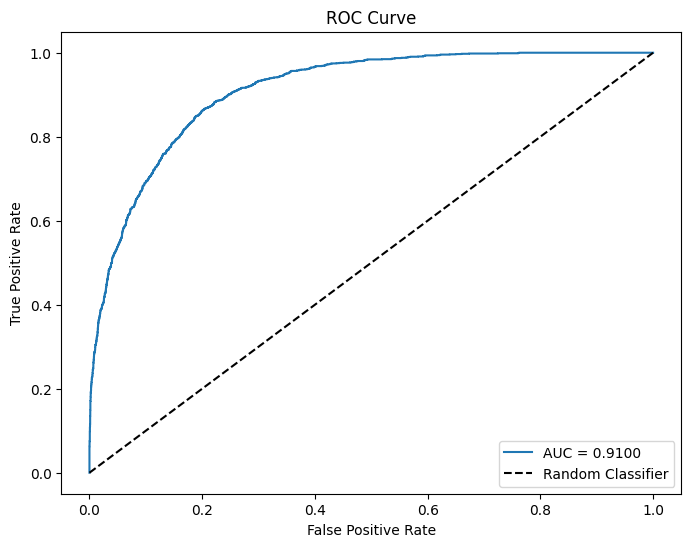

In [162]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()